# Analyse and plot the different projections

Note that we computed and show here all GCMs and scenarios that are currently available at the OGGM cluster. However, you have to choose those scenarios that are suitable and representative for your study. [For example, you could select them after the method of Hausfather et al., 2022)](https://www.nature.com/articles/d41586-022-01192-2) or [aggregate them after their warming levels (e.g. as in Rounce et al., 2023)](https://doi.org/10.1126/science.abo1324).

In [80]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 8)

In [81]:
# change this path to your local path 
path = '/home/www/oggm/oggm-standard-projections/oggm-standard-projections-csv-files/1.6.1/'

In [82]:
# IPCC colors from: https://pyam-iamc.readthedocs.io/en/stable/tutorials/ipcc_colors.html
colors_scenario = {# AR6 ssps (from CMIP6)
                    'ssp119':'#00a9cf', 'ssp126': '#003466',
                   'ssp245':'#f69320', 'ssp370':'#df0000',
                   'ssp434':'#2274ae',
                  'ssp460': '#b0724e', 'ssp534-over':'#92397a',
                  'ssp585':'#980002',
                   # AR5 rcp colors
                  #'rcp26': '#0000FF', 'rcp45':'#79BCFF', 'rcp60':'#FF822D', 'rcp85':'#FF0000',
                  # AR6 rcp colors
                  'rcp26': '#003466', 'rcp45':'#709fcc', 'rcp60':'#c37900', 'rcp85':'#980002'}



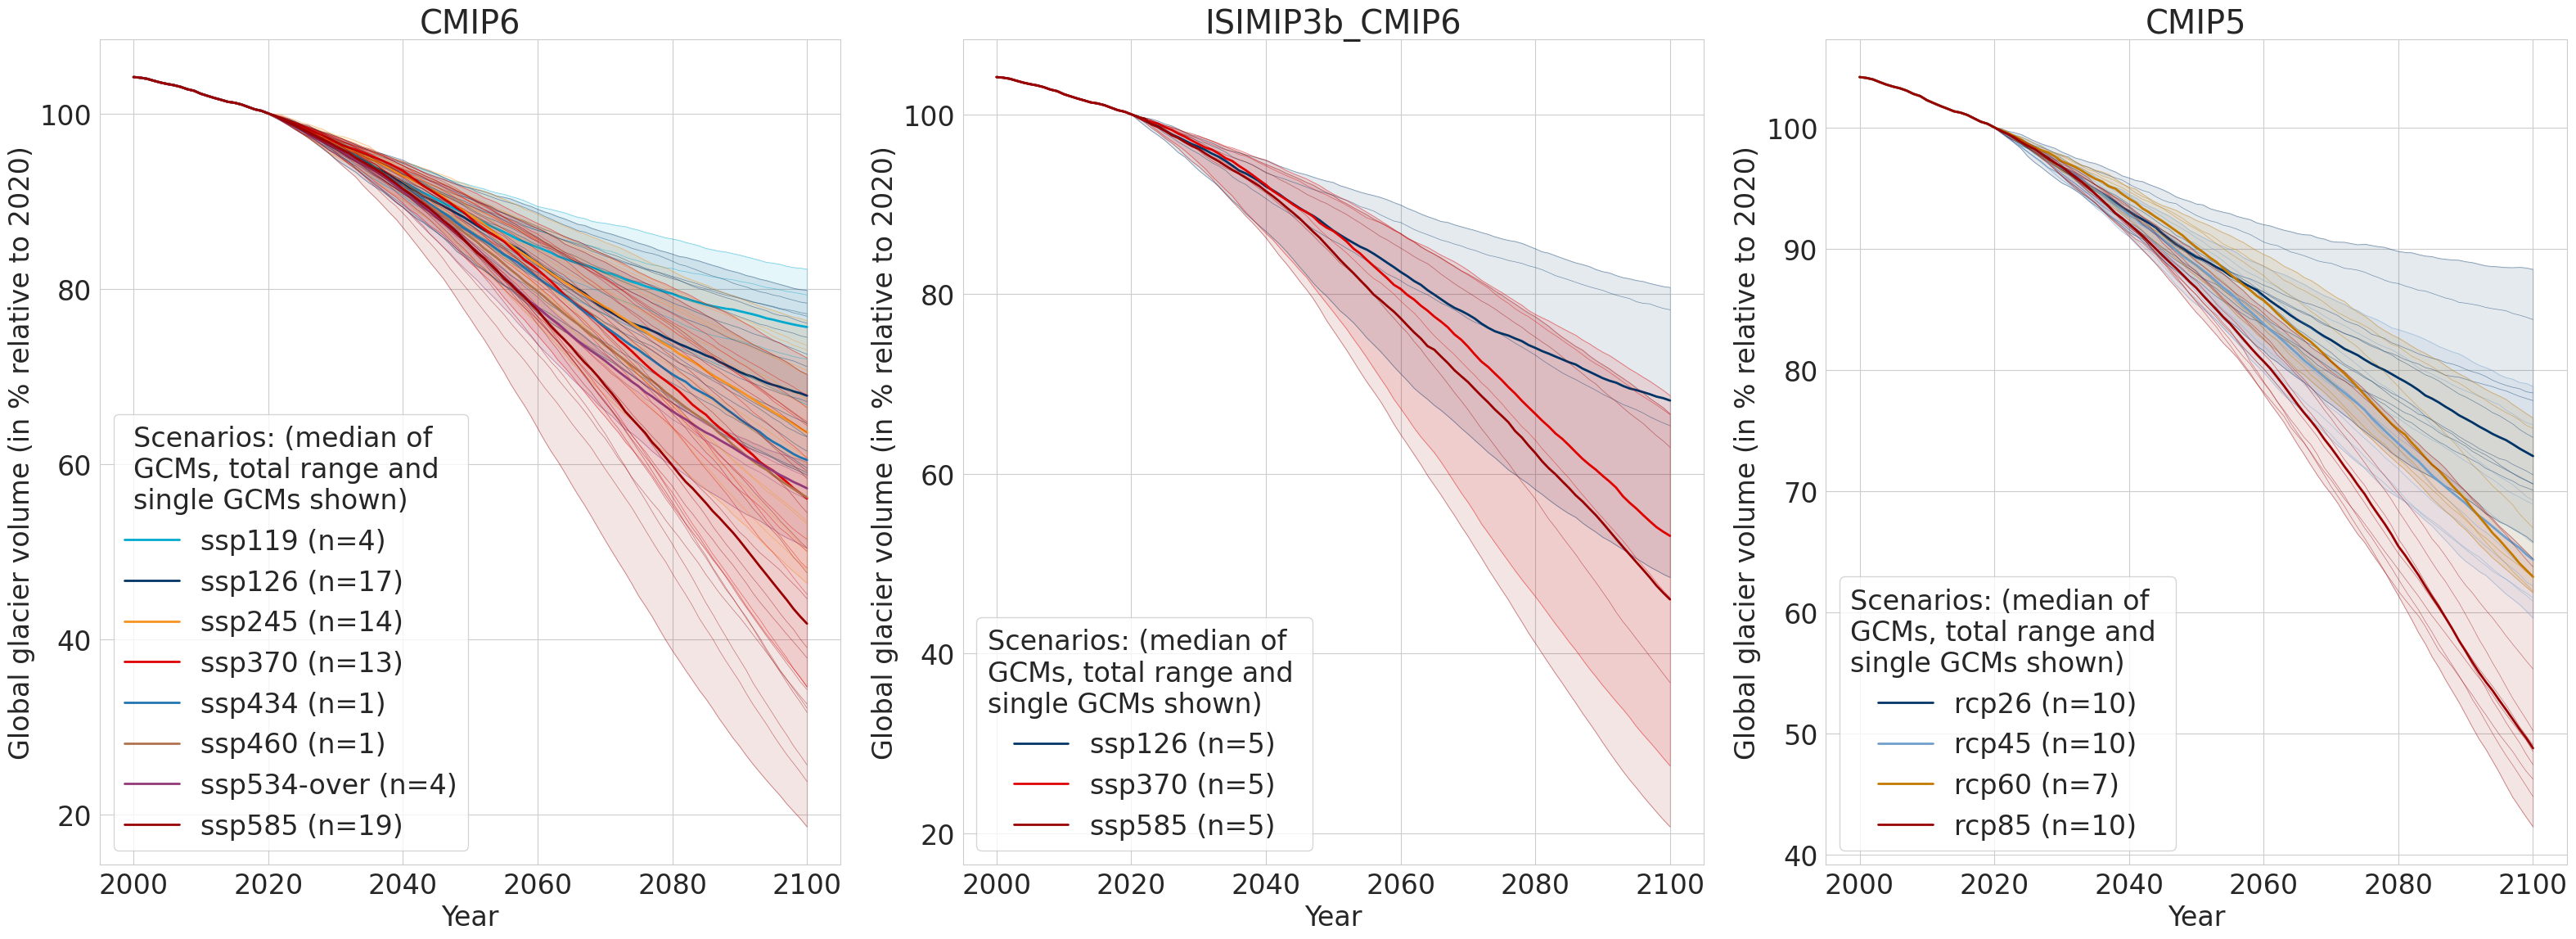

In [74]:
df_meta = pd.read_csv(f'{path}/common_running_2100/metadata.csv')
plt.rc('font', size=24)
end_year= 2100

plt.figure(figsize=(32,12)) #harey=True, sharex=True)
for j,cmip in enumerate(['CMIP6', 'ISIMIP3b_CMIP6', 'CMIP5']):
    plt.subplot(1,3,j+1)
    ax = plt.gca()
    scenario_list = list(df_meta.loc[(df_meta.cmip==cmip) & (df_meta.end_year==end_year)].scenario.unique())
    scenario_list.sort()
    for scenario in scenario_list:
        idir = path + 'common_running_2100/' + f'volume/{cmip}/{end_year}/global/'

        df = pd.read_csv(idir + f'{scenario}.csv', index_col=0)
        df_rel = 100*df/df.loc[2020]

        ax.plot(df.index, df_rel.median(axis=1), lw=2, color=colors_scenario[scenario], label = f'{scenario} (n={len(df_rel.columns)})')
        ax.plot(df.index, df_rel, lw=0.5, alpha = 0.5, color=colors_scenario[scenario]);
        ax.fill_between(df.index, df_rel.min(axis=1), df_rel.max(axis=1), alpha=0.1, color=colors_scenario[scenario])
        
        #if j==0:
        ax.set_ylabel('Global glacier volume (in % relative to 2020)')
        #else:
        #    ax.set_ylabel('')
        ax.set_xlabel('Year')
    ax.set_title(cmip)
    plt.legend(title='Scenarios: (median of \nGCMs, total range and \nsingle GCMs shown)');
    plt.tight_layout()
    plt.savefig('global_glacier_volume_until2100_common_running_2100.png')

### Figure 2: until 2300

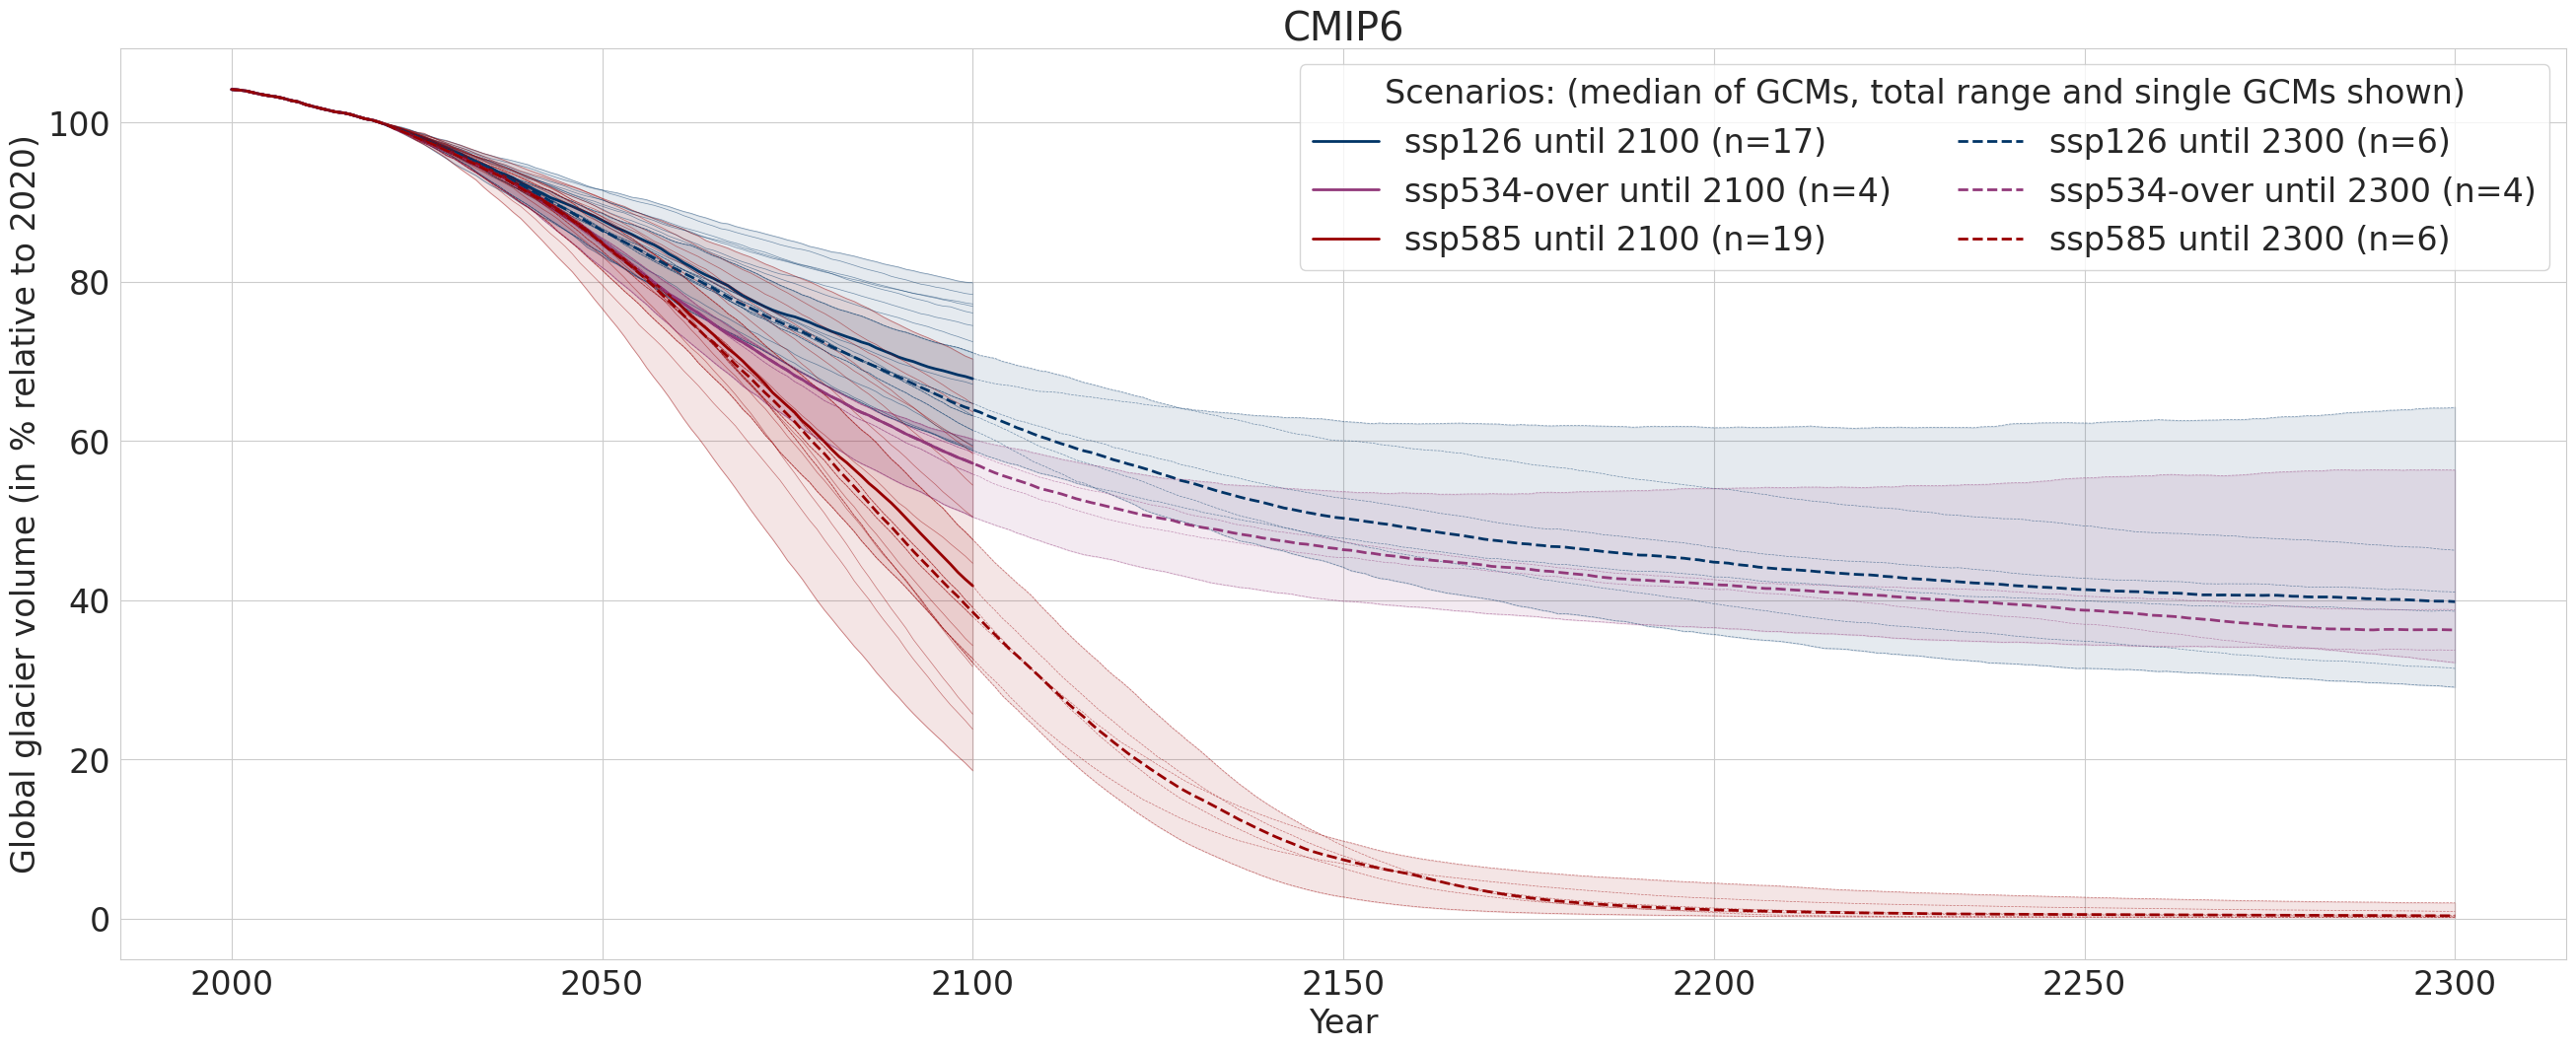

In [79]:
df_meta = pd.read_csv(f'{path}/common_running_2100_2300/metadata.csv')

plt.rc('font', size=24)
end_year= 2100
ls_d = {2100:'-', 2300:'--'}
plt.figure(figsize=(32,12)) #harey=True, sharex=True)
for j,cmip in enumerate(['CMIP6']):
    ax = plt.gca()
    for end_year in [2100,2300]:
        ls = ls_d[end_year]
        # let's only plot those scenarios that exist only until 2300
        scenario_list = list(df_meta.loc[(df_meta.cmip==cmip) & (df_meta.end_year==2300)].scenario.unique())
        scenario_list.sort()
        for scenario in scenario_list:
            idir = path + 'common_running_2100_2300/' + f'volume/{cmip}/{end_year}/global/'

            df = pd.read_csv(idir + f'{scenario}.csv', index_col=0)
            df_rel = 100*df/df.loc[2020]

            ax.plot(df.index, df_rel.median(axis=1), lw=2, color=colors_scenario[scenario],
                    label = f'{scenario} until {end_year} (n={len(df_rel.columns)})', ls= ls_d[end_year])
            ax.plot(df.index, df_rel, lw=0.5, alpha = 0.5, color=colors_scenario[scenario],
                   ls= ls_d[end_year]);
            ax.fill_between(df.index, df_rel.min(axis=1), df_rel.max(axis=1), alpha=0.1, color=colors_scenario[scenario])

            ax.set_ylabel('Global glacier volume (in % relative to 2020)')
            ax.set_xlabel('Year')
        #if end_year == 2100:
    plt.legend(title='Scenarios: (median of GCMs, total range and single GCMs shown)', ncol=2);

    ax.set_title(cmip)
    plt.savefig('global_glacier_volume_until2300_common_running_2100_2300.png')

## Regional plots

### TODO:

In [ ]:
d_reg_num_name = {}
d_reg_num_name['01'] = 'Alaska'
d_reg_num_name['02'] = 'Western Canada & USA'
d_reg_num_name['03'] = 'Arctic Canada North'
d_reg_num_name['04'] = 'Arctic Canada South'
d_reg_num_name['05'] = 'Greenland'
d_reg_num_name['06'] = 'Iceland'
d_reg_num_name['07'] = 'Svalbard and Jan Mayen'
d_reg_num_name['08'] = 'Scandinavia'
d_reg_num_name['09'] = 'Russian Arctic'
d_reg_num_name['10'] = 'North Asia'
d_reg_num_name['11'] = 'Central Europe'
d_reg_num_name['12'] = 'Caucasus and Middle East'
d_reg_num_name['13'] = 'Central Asia'
d_reg_num_name['14'] = 'South Asia West'
d_reg_num_name['15'] = 'South Asia East'
d_reg_num_name['16'] = 'Low Latitudes'
d_reg_num_name['17'] = 'Southern Andes'
d_reg_num_name['18'] = 'New Zealand'
d_reg_num_name['19'] = 'Antarctic and Subantarctic'

In [ ]:
plt.rc('font', size=24)

plt.figure(figsize=(32,32)) #harey=True, sharex=True)
#plt.ylabel('Volume (in % relative to 2020)')
df_scenario_hist = df_scenario.sel(hist=hist)

for j,r in enumerate(['Global', 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]):
    plt.subplot(4,5,j+1)

    if r == 'Global':
        rgi_reg = r
        df_scenario_sel = df_scenario_hist.sum(dim='rgi_reg') #=f'{r}.02f')
    else:
        rgi_reg = f'{r:02}'
        df_scenario_sel = df_scenario_hist.sel(rgi_reg=rgi_reg)